<a href="https://colab.research.google.com/github/Sunnn-y/DeepLearning/blob/main/20231011_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5(DNN%2C_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 DNN

## 실습 4 (IRIS)
- 붓꽃 데이터로 성능향상 모델 만들기

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
sns.get_dataset_names() # sns 데이터셋에 내장된 데이터 확인 가능

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 데이터 확인

In [ ]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print(type(df['petal_length'][0]),
      type(df['petal_width'][0]),
      type(df['sepal_length'][0]),
      type(df['sepal_width'][0]),
      type(df['species'][0]))

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'> <class 'str'>


In [ ]:
# sepal_length : 꽃받침 길이
# sepal_width : 꽃받침 너비
# petal_length : 꽃잎 길이
# petal_width : 꽃잎 너비

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

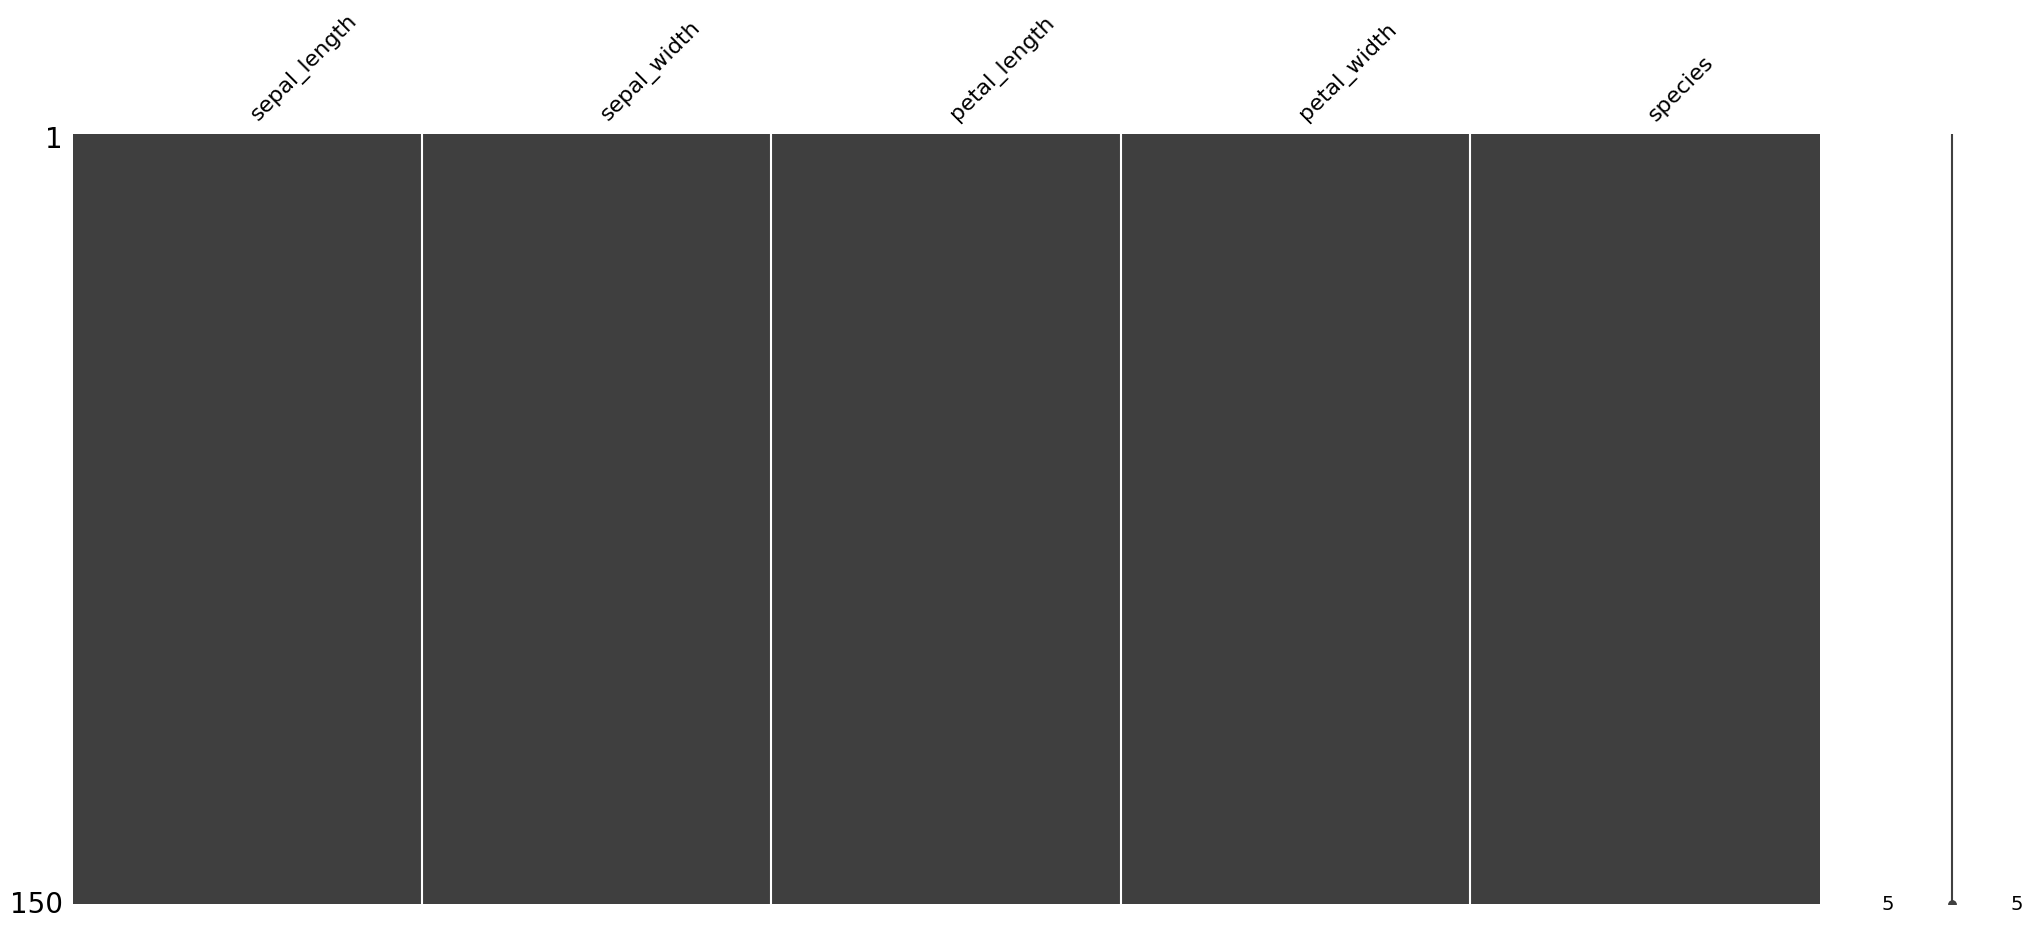

In [ ]:
# missing data가 있는지 다시 한번 그래프를 그려서 확인
import missingno as mino
mino.matrix(df)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### boxplot

<Axes: >

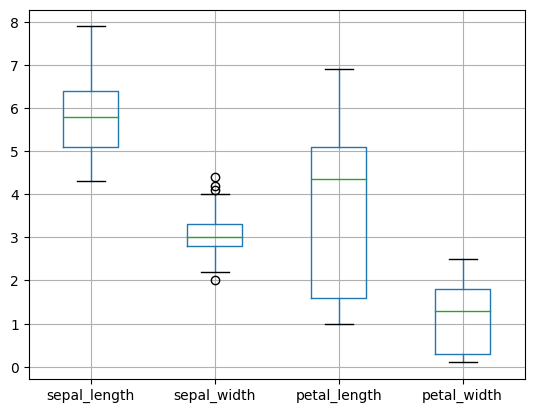

In [ ]:
data = df.iloc[:,:-1]
data.boxplot()

In [ ]:
# sepal_width에서 outlier 발견
# 다만 평균치에서 엄청나게 벗어난 것은 아니기 때문에 따로 조치를 취하지는 않음

### 산점도

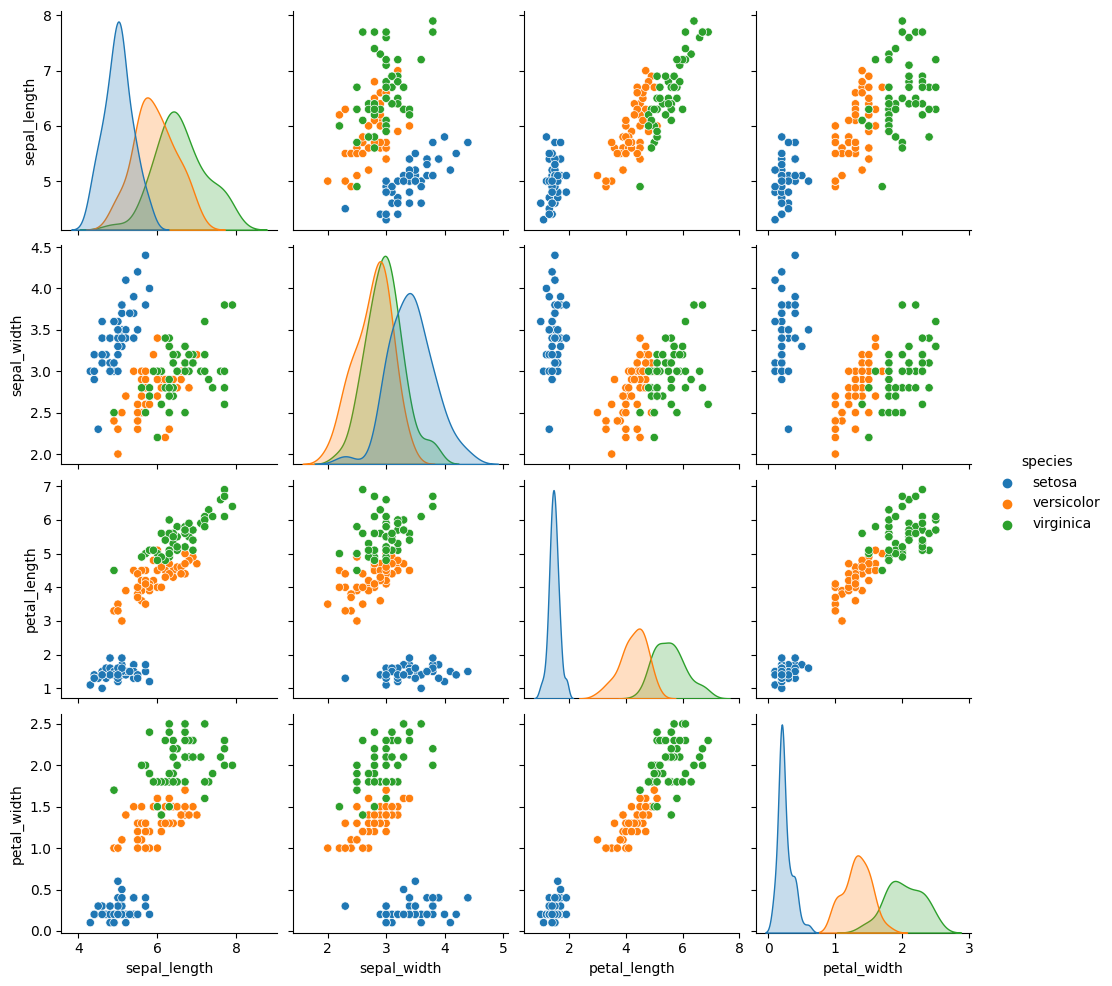

In [ ]:
sns.pairplot(df, hue='species')

### 데이터 전처리
- y값 인코딩 -> label로 사용되는 "species" 컬럼이 범주형이기 때문에 숫자형으로 변환해주어야 함

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = df.iloc[:, 0:4] # sepal_length,	sepal_width, petal_length, petal_width
y = df.iloc[:, -1]  # species

# 혹은 이렇게 써도 됨
# x = df[['sepal_length',	'sepal_width', 'petal_length', 'petal_width']]
# y = df['species']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
y_encoding = encoding.fit_transform(y)
y_encoding

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 모델링

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_encoding, test_size = 0.2,
                                                    random_state = 2) # test_size 의 디폴트값은 0.25

print('훈련:', len(x_train), len(y_train))
print('테스트:', len(x_test), len(y_test))

훈련: 120 120
테스트: 30 30


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'sprase_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


ValueError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('test_loss', test_loss)
print('test_acc', test_acc)

ValueError: ignored

### 모델 성능향상

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

df = sns.load_dataset("iris")

x = df.iloc[:, 0:4]
y = df.iloc[:, -1]

encoding = OneHotEncoder(sparse = False)
y_encoding = encoding.fit_transform(np.array(y).reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(x, y_encoding, test_size = 0.2,
                                                    random_state = 2)

model = Sequential()

model.add(Dense(1024, input_dim = 4, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 1000, batch_size = 10)

Epoch 1/1000
12/12 [==============================] - 4s 7ms/step - loss: 0.9205 - accuracy: 0.6083
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.7750
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.8500
Epoch 4/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.8833
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.3198 - accuracy: 0.8500
Epoch 6/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.2555 - accuracy: 0.9000
Epoch 7/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.1620 - accuracy: 0.9417
Epoch 8/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.2466 - accuracy: 0.9250
Epoch 9/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.1642 - accuracy: 0.9250
Epoch 10/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.2202 - accuracy: 0.9083

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('test_loss', test_loss)
print('test_acc', test_acc)

1/1 - 0s - loss: 0.0328 - accuracy: 1.0000 - 205ms/epoch - 205ms/step
test_loss 0.03278597816824913
test_acc 1.0


## 실습 5 (Titanic)

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore') # 경고 메세지 끄기

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 데이터 확인

In [ ]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# survived : 1-생존, 0-사망
# pclass : 객실등급
# sex : 성별
# age : 나이
# sibsp : 함께 탑승한 형제자매, 아내, 남편 수
# parch : 함께 탑승한 부모, 자식 수
# fare : 티켓요금
# embarked : 배에 탑승한 항구 이름
# class : 객실 등급 숫자
# who : 성별
# adult_male : 성인 남성
# deck : 배에 탑승한 항구 이름
# embark_town : 배에 탑승한 항구 이름
# alive : yes-생존, no-사망
# alone : 동반 탑승 유무

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

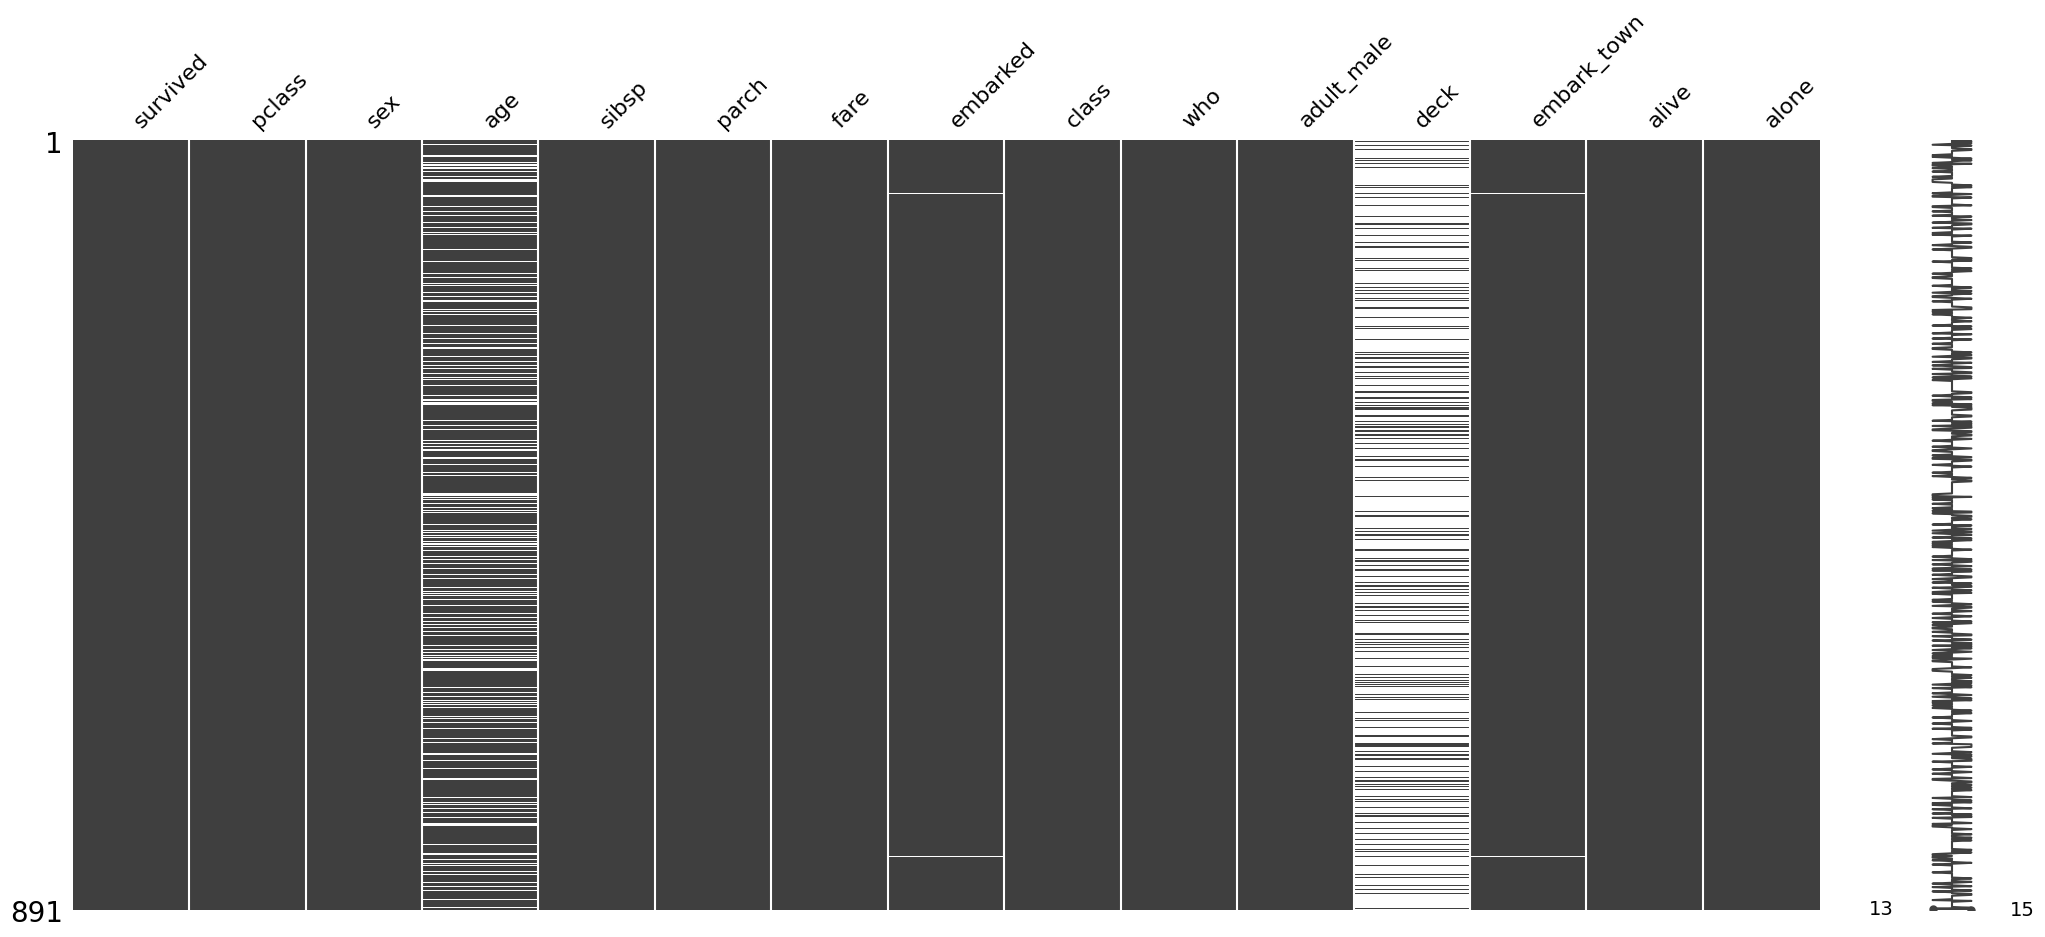

In [ ]:
import missingno as mino
mino.matrix(titanic) # 결측치 있는지 다시 한번 확인

# nan 값이 있는 데이터 : age, embarked, deck

### boxplot

<Axes: >

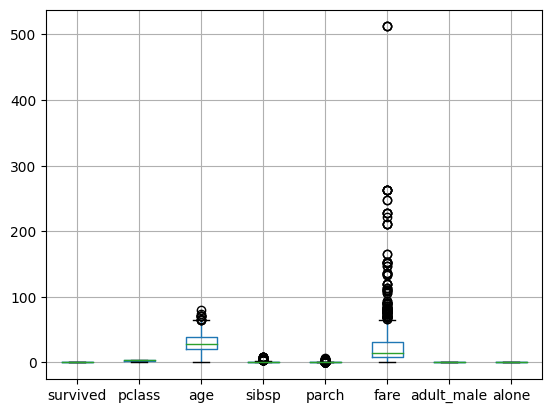

In [ ]:
data = titanic.iloc[:,1:]
titanic.boxplot()

In [ ]:
# fare 에서 발견된 아웃라이어 처리 필요

### 데이터 전처리

In [ ]:
titanic = sns.load_dataset('titanic')

titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'adult_male', 'alone']]
print('초기데이터:', len(data))

초기데이터: 891


In [ ]:
# fare 데이터 중 이상치 처리
titanic[titanic['fare']>500]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
258,1,1,female,35.0,0,0,512.3292,C,False,True
679,1,1,male,36.0,0,1,512.3292,C,True,False
737,1,1,male,35.0,0,0,512.3292,C,True,True


In [ ]:
data = titanic.drop([258, 679, 737])

<Axes: >

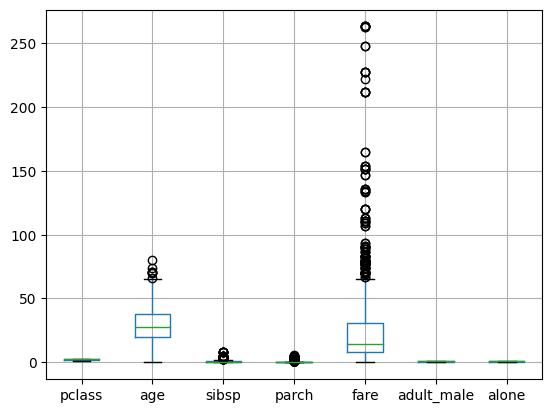

In [ ]:
data.iloc[:,1:].boxplot()

In [ ]:
data[data.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
61,1,1,female,38.0,0,0,80.0,NaN,False,True
829,1,1,female,62.0,0,0,80.0,NaN,False,True


In [ ]:
data.dropna(inplace = True)

<Axes: >

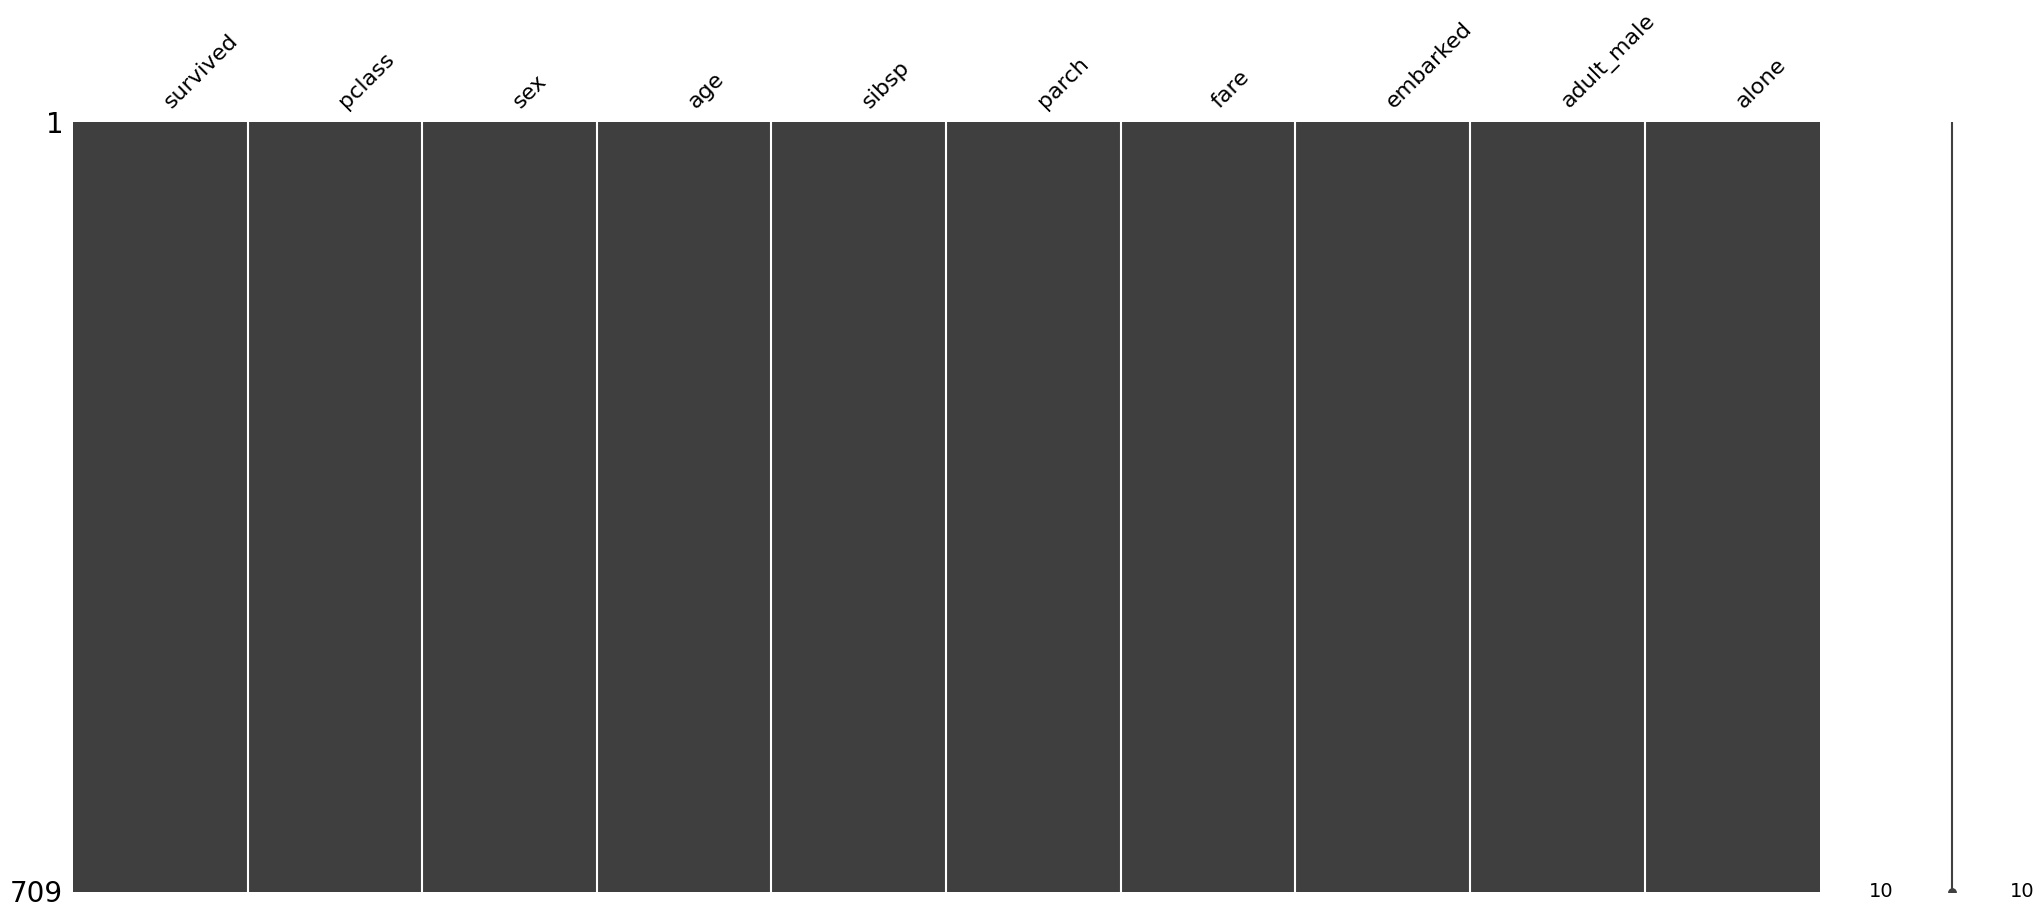

In [ ]:
import missingno as mino
mino.matrix(data) # 결측치 있는지 다시 한번 확인

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
data['sex'] = encoding.fit_transform(data['sex'])
data['adult_male'] = encoding.fit_transform(data['adult_male'])
data['alone'] = encoding.fit_transform(data['alone'])
data['embarked'] = data['embarked'].apply(lambda x : x.replace('C', '0').replace('Q', '1').replace('S', '2'))
data['age'].fillna(data['age'].mean(), inplace = True) # age 결측치는 평균으로 채워넣기

data = data.astype('float')
y_encoding = encoding.fit_transform(data['survived'])

In [ ]:
# df=df.drop("deck", axis=1)
# df=df.drop("embark_town", axis=1)
# 필요 없을 것 같은 데이터 임의로 지우기(를 시도했었음...)

### 모델링

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y_encoding, random_state = 42)

model = Sequential()

model.add(Dense(8, input_dim = 9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 10, batch_size = 10)

ValueError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('test_loss', test_loss)
print('test_acc', test_acc)

# 딥러닝 CNN

## 실습 01

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
import matplotlib.pyplot as plt

# 이미지 그릴 박스 크기 설정
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 5)

axes.imshow(x_train[0], cmap='gray')
axes.set_title(str(y_train[0]))

plt.show()

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2,5)
fig.set_size_inches(10, 5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap='gray')
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

### DNN으로 MNIST 구현

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

# MNIST data는 각 픽셀이 0~255 사이의 정수값을 가진다.
# 이런 이미지의 경우 보통 255로 나누어 0 ~ 1 사이 값으로 정규화를 한다.
# 표준화는 아니지만, 양수값으로 이루어진 이미지 전처리에 주로 사용되는 방법이다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 0 ~ 9 로 카테고리가 총 10개

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,
          validation_data = (x_test, y_test), epochs = 5)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

### CNN으로 MNIST 구현

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
# data normalization - reshape 필요
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 28, 28, 1)  # 만약에 컬러 데이터라면? 1 => 3
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
           padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 5)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

## 실습 02

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),( x_test, y_test) = fmnist.load_data()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
import matplotlib.pyplot as plt

# 이미지 그릴 박스 크기 설정
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 5)

axes.imshow(x_train[0])
axes.set_title(str(y_train[0]))

plt.show()

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2,5)
fig.set_size_inches(10, 5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap='gray')
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
# data normalization - reshape 필요
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
           padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 5)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

## 실습 03

In [ ]:
import urllib.request
import zipfile

url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [ ]:
TRAINING_DIR = "tmp/rps/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
    )